In [11]:
import pandas as pd
import numpy as np
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
english_stopwords = stopwords.words('english')

tidytext_stopwords = pd.read_csv(
    "https://raw.githubusercontent.com/juliasilge/tidytext/master/data-raw/stop_words.csv"
)

In [3]:
df = pd.read_csv('the_office.csv', index_col=0)
df.head()

,character,line,season,episode
0,Michael,All right Jim. Your quarterlies look very goo...,1,1
1,Jim,"Oh, I told you. I couldn’t close it. So…",1,1
2,Michael,So you’ve come to the master for guidance? Is...,1,1
3,Jim,"Actually, you called me in here, but yeah.",1,1
4,Michael,"All right. Well, let me show you how it’s don...",1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58721 entries, 0 to 59293
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   character  58721 non-null  object
 1   line       58721 non-null  object
 2   season     58721 non-null  int64 
 3   episode    58721 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [5]:
df.isnull().sum()

character    0
line         0
season       0
episode      0
dtype: int64

In [7]:
# word_count_per_character = {}

# for character in df['character'].unique():
#     word_count_per_character[character] = df[df['character'] == character].line_preproccesed.apply(lambda x: len(str(x).split())).sum()

In [8]:
from collections import Counter
word_count_per_character_most_common = Counter(word_count_per_character).most_common(10)
word_count_per_character_most_common

[]

In [12]:
import string
from string import punctuation

def preprocess_text(text):
    text = re.sub(r'\[[^\]]*\]', '', text)
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)
    words = [word for word in text.split() if word.isalpha()]
    text = " ".join(words)
    return text

In [13]:
df['line_preproccesed'] = df['line'].apply(lambda x: preprocess_text(x))

In [27]:
def generate_wordcloud(character, img_path=None, out_path=None):
    subset = df[df['character'] == character]
    text = " ".join(subset.line_preproccesed.values)
    mask = np.array(Image.open(img_path))
    wordcloud = WordCloud(stopwords=english_stopwords 
                        + list(['oh', 'uh', 'um', 'yeah', 'okay', 'ok', 'ye', 'know', 'right', 'well', 'hey', 'gonna']
                        + list(tidytext_stopwords['word'])
), background_color='white', mode='RGBA', mask=mask).generate(text)
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[7,7])
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis('off')
    wordcloud.to_file(out_path)
    plt.show()

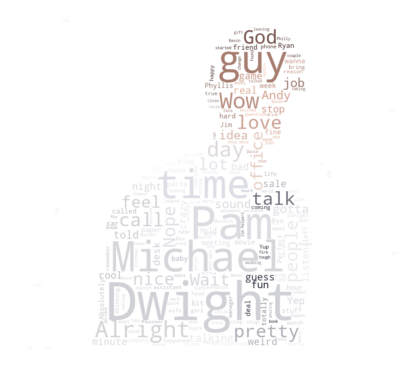

In [28]:
generate_wordcloud(character='Jim', img_path='img/jim.png', out_path='output/wordcloud_jim.png')

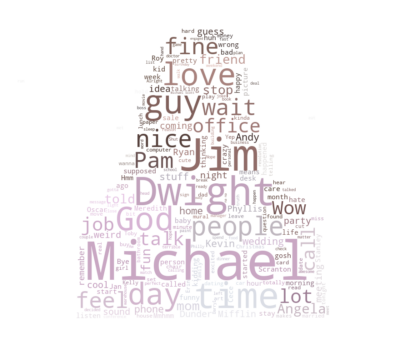

In [29]:
generate_wordcloud(character='Pam', img_path='img/pam.png', out_path='output/wordcloud_pam.png')

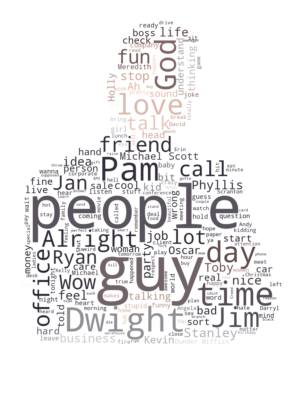

In [30]:
generate_wordcloud(character='Michael', img_path='img/michael.png', out_path='output/wordcloud_michael.png')

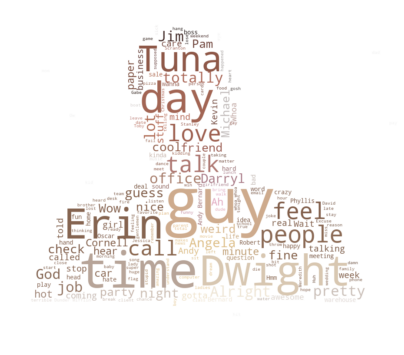

In [31]:
generate_wordcloud(character='Andy', img_path='img/andy.png', out_path='output/wordcloud_andy.png')

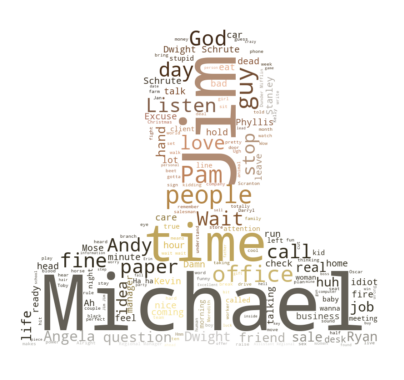

In [32]:
generate_wordcloud(character='Dwight', img_path='img/dwight.png', out_path='output/wordcloud_dwight.png')

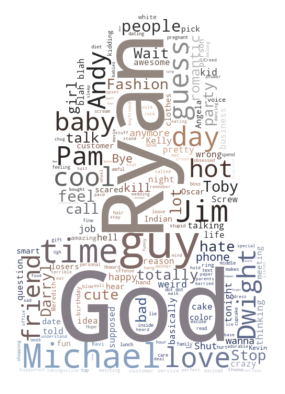

In [33]:
generate_wordcloud(character='Kelly', img_path='img/kelly.png', out_path='output/wordcloud_kelly.png')

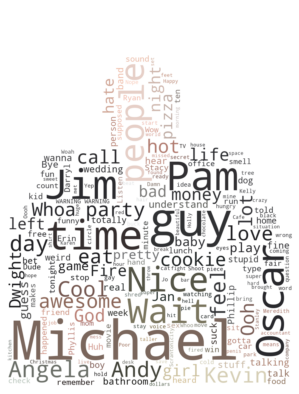

In [34]:
generate_wordcloud(character='Kevin', img_path='img/kevin.png', out_path='output/wordcloud_kevin.png')

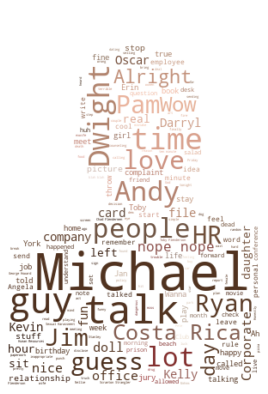

In [35]:
generate_wordcloud(character='Toby', img_path='img/toby.png', out_path='output/wordcloud_toby.png')

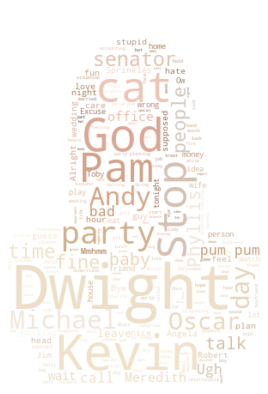

In [36]:
generate_wordcloud(character='Angela', img_path='img/angela.png', out_path='output/wordcloud_angela.png')

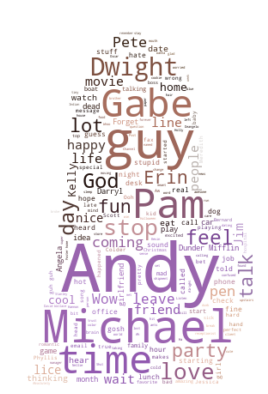

In [37]:
generate_wordcloud(character='Erin', img_path='img/erin.png', out_path='output/wordcloud_erin.png')

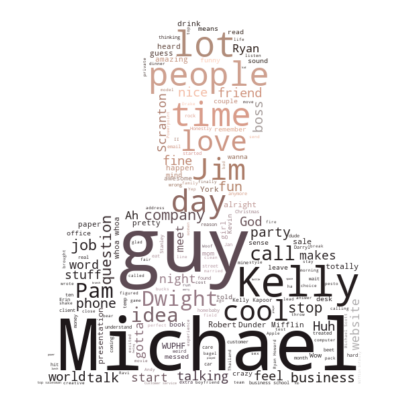

In [38]:
generate_wordcloud(character='Ryan', img_path='img/ryan.png', out_path='output/wordcloud_ryan.png')

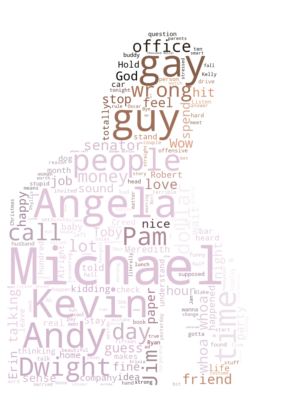

In [39]:
generate_wordcloud(character='Oscar', img_path='img/oscar.png', out_path='output/wordcloud_oscar.png')

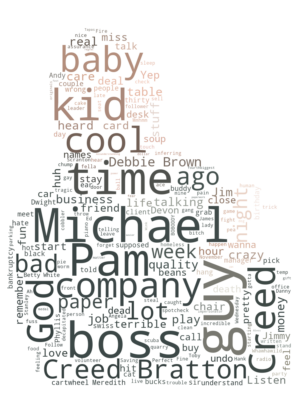

In [44]:
generate_wordcloud(character='Creed', img_path='img/creed.png', out_path='output/wordcloud_creed.png')

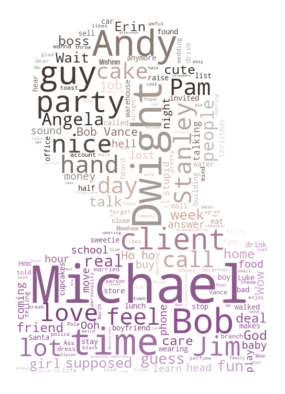

In [43]:
generate_wordcloud(character='Phyllis', img_path='img/phyllis.png', out_path='output/wordcloud_phyllis.png')

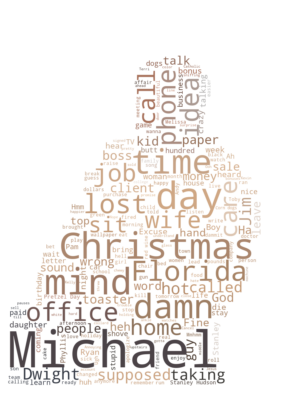

In [42]:
generate_wordcloud(character='Stanley', img_path='img/stanley.png', out_path='output/wordcloud_stanley.png')